# Discretising the Lotka-Volterra model
## Overview
In this worksheet we will consider the Lotka-Volterra model and discretise it using a finite difference method. In particular:
we will use a forward Euler method to approximate the derivatives in the Lotka-Volterra model;
we will analyse the behaviour of the model numerically;
we will attempt to fit the parameters of the model to our data.

## The Lotka-Volterra model
One approach to modelling predator-prey interactions, such as those in the hare-lynx data, is using a Lotka-Volterra model:
\begin{align*}
\frac{\mathrm{d} H}{\mathrm{d} t} &= \alpha H - \beta H L \; ,\\
\frac{\mathrm{d} L}{\mathrm{d} t} &= \delta H L - \gamma L \; ,
\end{align*}
where $H$ and $L$ represent the number of hare and lynx respectively, and $\alpha$, $\beta$, $\gamma$ and $\delta$ are positive real parameters.

### Exercises
- Find out what each term in the equations represent and ensure you can explain how to derive these equations.

- To what extent is each term physically realistic?  How might you adapt the terms to make them more physically realistic?

## The Forward Euler approximation
Given an ODE of the form 

\begin{equation}
\frac{d{\bf{y}}}{dt} = {\bf{f}}({\bf{y}}), \quad t\ge t_0, \quad {\bf{y}}(t_0)={\bf{y}}_0
\end{equation}
we wish to find the value of ${\bf{y}}$ at a discrete set of evenly distributed points $t_1, t_2, ..., t_n$.

Integrating our ODE between $t_i$ and $t_{i+1}$ gives
\begin{align}
{\bf{y}}(t_{i+1}) &= {\bf{y}}(t_i) + \int_{t_i}^{t_{i+1}}{\bf{f}}({\bf{y}}(\tau)) d\tau \\
&\approx {\bf{y}}(t_i) + (t_{i+1}-t_i){\bf{f}}({\bf{y}}_i) \\
&= {\bf{y}}(t_i) + \Delta t{\bf{f}}({\bf{y}}_i)
\end{align}
where $\Delta t$ is the (constant) distance between our time points and ${\bf{y}}_i = {\bf{y}}(t_i)$.

We can now write some pseudocode for our algorithm applied to the Lotka-Volterra model:

1. initialise H, L, the model parameters $\alpha$, $\beta$, $\gamma$ and $\delta$, the start time $t_0$, our timestep $\Delta t$ and an end time $t_{max}$

2. write a loop to update the values according to:
\begin{align}
  H_{i+1} &= H_i + \Delta t (\alpha H_i - \beta H_i L_i) \\
  L_{i+1} &= L_i + \Delta t (\delta H_i L_i - \gamma L_i) \\
  t_{i+1} &= t_i + \Delta t
\end{align}

3. plot the data

In [1]:
# specify parameters for the model
t0 = 1847  # start time
t_max = 1935  # final time
dt = 0.01  # timestep
alpha = 0.2
beta = 0.01
gamma = 1.
delta = 0.01
H0 = 21  # initial number of hare (in thousands)
L0 = 49  # initial number of lynx (in thousands)

# create lists to store data for plotting
hare = [H0]
lynx = [L0]
time = [t0]

# initialise time, and hare and lynx populations
t = t0
Hi = H0
Li = L0

# timestepping loop
while t < t_max:
    Hip1 = Hi + dt*(alpha*Hi - beta*Hi*Li)
    Lip1 = Li + dt*(delta*Hi*Li - gamma*Li)
    t += dt
    # append newest values to lists
    hare.append(Hip1)
    lynx.append(Lip1)
    time.append(t)
    # update Hi and Li to continue timestepping
    Hi = Hip1
    Li = Lip1


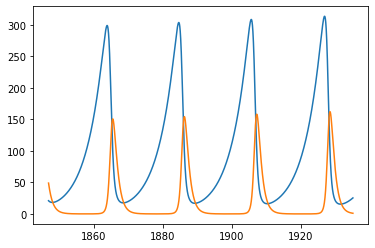

In [2]:
import matplotlib.pyplot as plt
plt.plot(time, hare)
plt.plot(time, lynx)
plt.show()

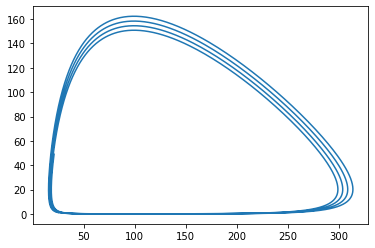

In [3]:
plt.plot(hare, lynx)
plt.show()

### Exercises
Experiment with different values for the discrectisation, parameters and timestep.
- Note that when we compute $L_{i+1}$ we could choose to use the most recent value for $H$, i.e. $H_{i+1}$ instead of $H_i$. Does this make any difference to the behaviour of the model?
- How does the behaviour of the model change as the parameters vary?
- Does the model always demonstrate periodicity?
- How does varying the timestep affect the solution?

## Estimating the parameters
We could continue with a trial and error approach to improving the parameters of the Lotka-Volterra model, but we can also try to estimate the parameters from the data we have.

We know the hare population values $H_0 = 21$, $H_1 = 12$ and $H_2 = 24$ for the years 1847-1849, and similarly we know the corresponding lynx population values $L_0 = 49$, $L_1 = 21$, $L_2 = 9$.

Substituting into our finite difference approximation gives
\begin{align*}
-9 = \frac{12-21}{1848-1847} = \frac{H_1-H_0}{t_1-t_0} &= \alpha H_0 - \beta H_0 L_0 = 21\alpha - 21 \times 49 \beta \; ,\\
-28 = \frac{21-49}{1848-1847} = \frac{L_1-L_0}{t_1-t_0} &= \delta H_0 L_0 - \gamma L_0 = 21 \times 49 \delta - 49 \gamma\; ,\\
12 = \frac{24-12}{1849-1848} = \frac{H_2-H_1}{t_2-t_1} &= \alpha H_1 - \beta H_1 L_1 = 12\alpha - 12 \times 21 \beta\; ,\\
-12 = \frac{9-21}{1849-1848} = \frac{L_2-L_1}{t_2-t_1} &= \delta H_1 L_1 - \gamma L_1 = 12 \times 21 \delta - 21 \gamma \; .
\end{align*}

This gives us four linear equations in four unknowns, so provided they aren't degenerate we should be able to solve uniquely for the parameters $\alpha$, $\beta$, $\gamma$ and $\delta$.

We could do this by hand, but let's get Python and the numpy module to do the work for us!  To do so, let's rearrange it all into a matrix equation:
$$ \begin{bmatrix} 21 & -1029 & 0 & 0 \\ 0 & 0 & -49 & 1029 \\ 12 & -252 & 0 & 0 \\ 0 & 0 & -21 & 252 \end{bmatrix} \begin{bmatrix} \alpha \\ \beta \\ \gamma \\ \delta \end{bmatrix} = \begin{bmatrix} -9 \\ -28 \\ 12 \\ -12 \end{bmatrix} \; .$$

Now we can do the calculation using numpy arrays.

In [ ]:
import numpy as np

A = np.array([[21,-1029,0,0],[0,0,-49,1029],[12,-252,0,0],[0,0,-21,252]])
b = np.array([[-9],[-28],[12],[-12]])
x = np.linalg.solve(A, b)
print(x)

### Exercise
The solution $\delta=0$ is going to cause problems (find out why!) and the parameters are supposed to be positive, so add a small amount and look at the behaviour of your model.